In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
survey = pd.read_csv("kaggle_survey_2020_responses.csv", low_memory=False)

In [3]:
survey = survey.drop(index=0)

### AGE 

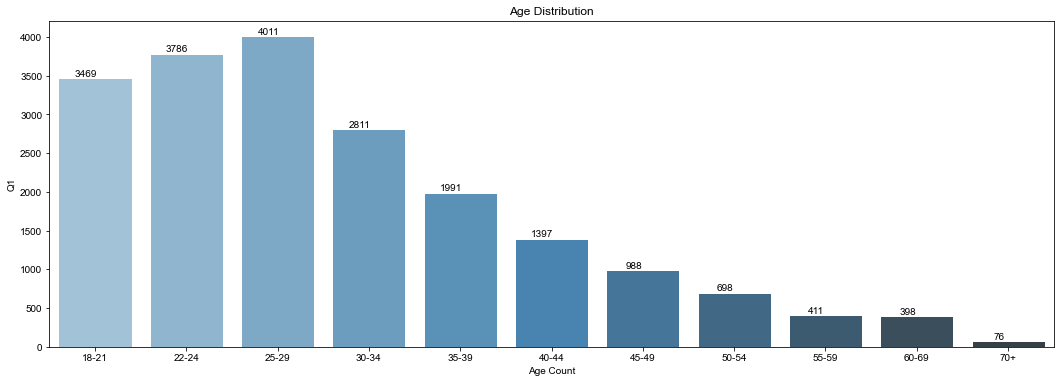

In [4]:
q1_data= survey["Q1"].value_counts().sort_index()
plt.figure(figsize=(18, 6))
plt.title("Age Distribution")
plt.xlabel("Age Count")
plt.ylabel("Age Range")
sns.set_style("darkgrid")
graph = sns.barplot(x=q1_data.index, y=q1_data, palette="Blues_d")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### From the chart above it is observed that of all the people who took this survey, people in their mid to late 20's are the most popular. 

## Gender 

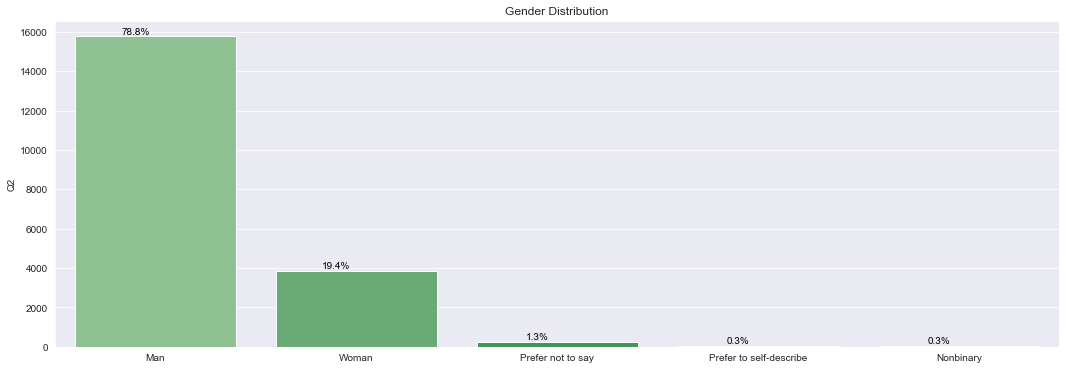

In [5]:
q2_data= survey["Q2"].value_counts()
plt.figure(figsize=(18, 6))
plt.title("Gender Distribution")
graph = sns.barplot(x=q2_data.index, y=q2_data, palette="Greens_d")

for p in graph.patches:
        graph.annotate('{:.1f}%'.format((p.get_height() / sum(q2_data)) * 100), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### Based on the gender data it is observed that a whooping 78.8% of data scientist/analyst who took the survey are men which is a 59.4% increase compared to the women who took the survey(19.4%)